In [ ]:
import pandas as pd 
import numpy as np
import random as rd
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
import statsmodels.tsa.api as smt
import statsmodels.api as sn
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("wiki_machine_learning.csv",delimiter=" ")

In [ ]:
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [ ]:
df.tail()

,date,count,lang,page,rank,month,title
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning
372,2016-01-20,3559,en,Machine_learning,8708,201601,Machine_learning


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 24.0+ KB


date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

In [ ]:
df.columns

Index(['date', 'count', 'lang', 'page', 'rank', 'month', 'title'], dtype='object')

In [ ]:
a = df.loc[df['count'] == 0]
a

,date,count,lang,page,rank,month,title
104,2015-02-05,0,en,Machine_learning,8708,201502,Machine_learning


In [ ]:
df.drop(df[df['count'] == 0].index, inplace = True)

In [ ]:
df['date'].min(), df['date'].max()

('2015-01-01', '2016-01-20')

In [ ]:
cols = ['lang', 'page', 'rank', 'month', 'title']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('date')
df.isnull().sum()

date     0
count    0
dtype: int64

In [ ]:
df.head()


,date,count
81,2015-01-01,1414
80,2015-01-02,1920
79,2015-01-03,1338
78,2015-01-04,1404
77,2015-01-05,2264


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(383, 2)

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)
plotly_df(df.set_index("date")[["count"]])

In [ ]:
df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

,ds,y
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389
382,2016-01-20,3559


In [ ]:
model= Prophet(yearly_seasonality=True, interval_width=0.95)
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
ft=model.make_future_dataframe(periods=30)
pred=model.predict(ft)
pred[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
408,2016-02-15,2922.083147,2370.071900,3503.047506
409,2016-02-16,3169.136816,2565.156464,3710.013173
410,2016-02-17,3073.621481,2497.225915,3678.102068
411,2016-02-18,2977.178413,2355.015078,3575.428189
412,2016-02-19,2672.158104,2000.292018,3254.249931


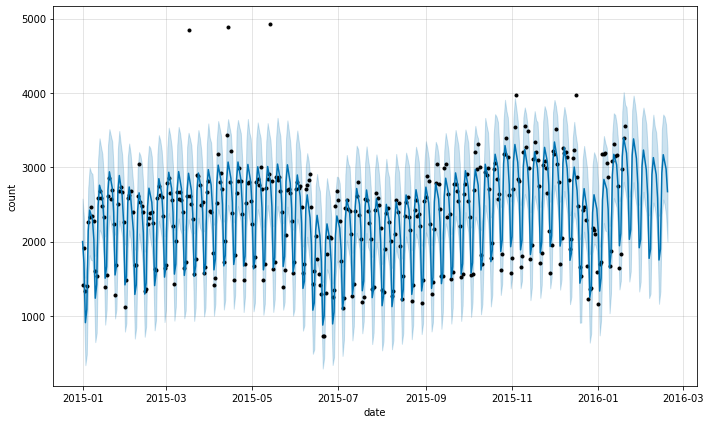

<Figure size 1152x576 with 0 Axes>

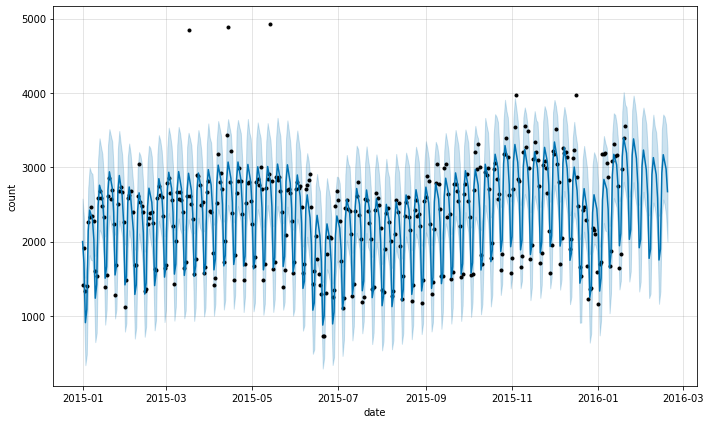

In [ ]:
plt.figure(figsize=(16,8))
model.plot(pred, xlabel="date", ylabel="count")

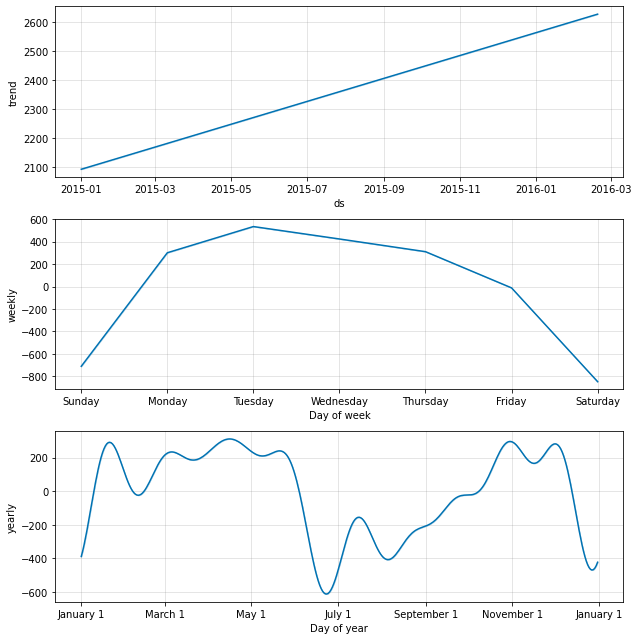

In [ ]:
fig=model.plot_components(pred)

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
# model = NeuralProphet() if you're using default variables below.
model = NeuralProphet()

In [ ]:
metrics = model.fit(df, freq="MS") 
future = model.make_future_dataframe(df, periods=30, n_historic_predictions=len(df)) 
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.217% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.217% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch

  0%|          | 0/117 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.13E-01, min: 4.70E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.13E-01, min: 4.70E-01


  0%|          | 0/117 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.35E-01, min: 4.70E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.35E-01, min: 4.70E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.15E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.15E-01
Epoch[273/273]: 100%|██████████| 273/273 [00:22<00:00, 11.93it/s, SmoothL1Loss=0.00909, MAE=214, RMSE=301, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.217% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.217% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.446% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.446% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_

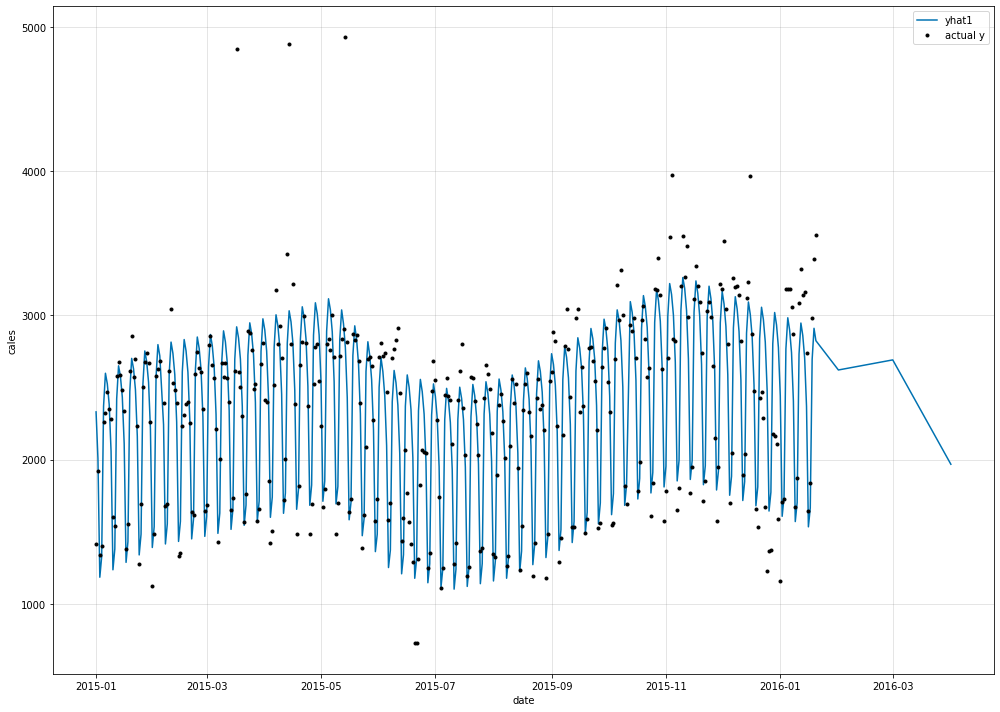

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="date", ylabel="cales", ax=ax);

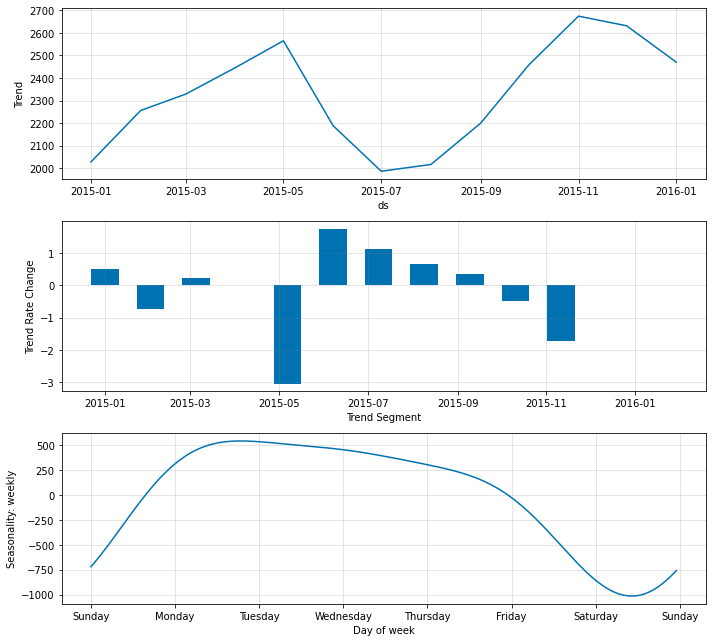

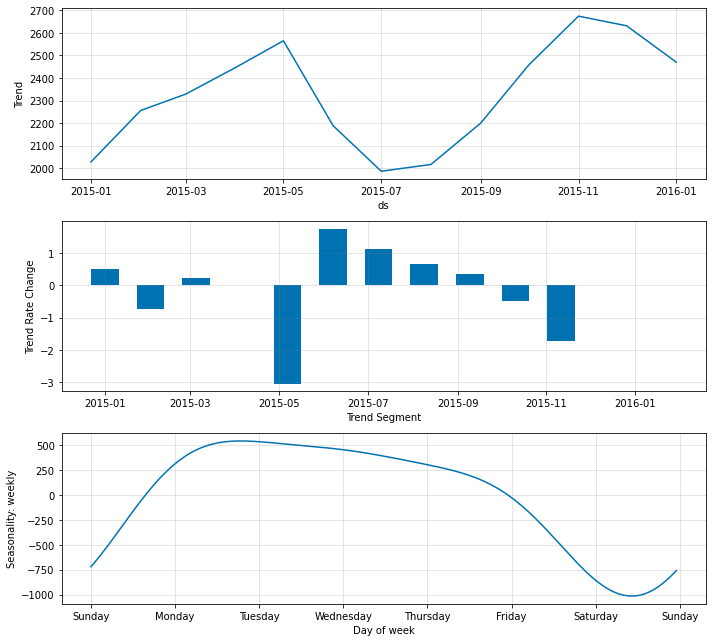

In [ ]:
model.plot_parameters()

In [ ]:
df.tail()

,ds,y
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389
382,2016-01-20,3559
